<div style="border:solid green 2px; padding: 20px">
<b>Привет, Владислав!</b>

Меня зовут Александр Пономаренко, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b>
    Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Содержание
- Содержание
- Постановка задачи
- Выгрузка данных
- Анализ данных
- Подготовка данных
- Построение нейронной сети
- Улучшение сети
- Выводы

# Постановка задачи

На основе данных характеристик 240 звезд нужно построить нейронную сеть, которая будет предсказывать температуру на поверхности новых звезд.
<br/><br/>
Количественные показатели:
- Относительная светимость (L/Lo) - относительно Солнца
- Относительный радиус (R/Ro) - относительно Солнца
- Абсолютная звездная величина (Mv) - физическая величина
<br/><br/>

Качественные показатели:
- Звездный цвет - ('white', 'red', 'blue', 'yellow', 'yellow-orange', etc)
- Тип звезды - (0, 1, 2, 3, 4, 5)
  - 0 - Коричневый карлик
  - 1 - Красный карлик
  - 2 - Белый карлик
  - 3 - Звезды главной последовательности
  - 4 - Сверхгигант
  - 5 - Гипергигант
<br/><br/>

Количественный результат:
- Абсолютная температура (T(K)) - температура на поверхности звезды в Кельвинах
<br/><br/>

Предварительный анализ:
- Результат количественный - на выходе можно ожидать алгоритм регрессии
- Функция потерь - MSE / MAE
- С количеством скрытых слоев придется экспериментировать
  - Много показателей (измерений), скорее всего 3-5 скрытых слоев будет лучше работать

# Выгрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import os
import random
import time
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

In [3]:
LOCAL_PATH = './datasets/6_class.csv'
WEB_PATH = '/datasets/6_class.csv'

RANDOM_STATE = 2023

In [4]:
if os.path.exists(LOCAL_PATH):
    df = pd.read_csv(LOCAL_PATH, index_col=0)
elif os.path.exists(WEB_PATH):
    df = pd.read_csv(WEB_PATH, index_col=0)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, хорошо, данные на месте:)  Можно как вариант еще написать условие когда не нашел ни один путь:

```python
    
if os.path.exists(LOCAL_PATH):
    df = pd.read_csv(LOCAL_PATH, index_col=0)
elif os.path.exists(WEB_PATH):
    df = pd.read_csv(WEB_PATH, index_col=0)   
else:
    print('something')
```

</div>

# Анализ данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 13.1+ KB


в данных нет пропусков

### Пореименнуем колонки, чтобы было легче их использовать

In [6]:
df = df.rename(columns={
    'Temperature (K)': 'temp',
    'Luminosity(L/Lo)': 'lumin',
    'Radius(R/Ro)': 'radius',
    'Absolute magnitude(Mv)': 'magnitude',
    'Star type': 'type',
    'Star color': 'color'
})

In [7]:
df.columns

Index(['temp', 'lumin', 'radius', 'magnitude', 'type', 'color'], dtype='object')

### Проверим категориальные данные

In [8]:
pd.value_counts(df.type)

type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

данные распределенны нормально

In [9]:
pd.value_counts(df.color)

color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64

нужно будет устранить неявные ошибки

### Проверка количественных данных

<Axes: >

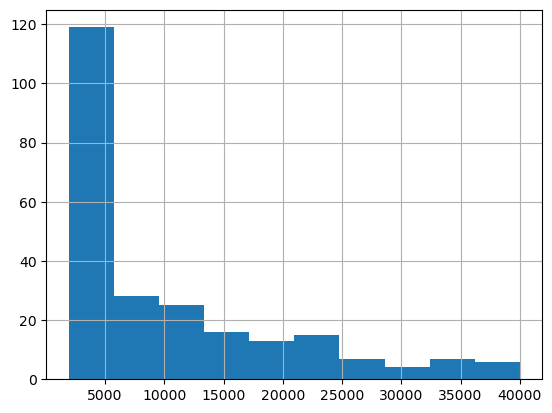

In [10]:
df.temp.hist()

Данные выглядят хорошо, нет выбросов (target feature)

<Axes: >

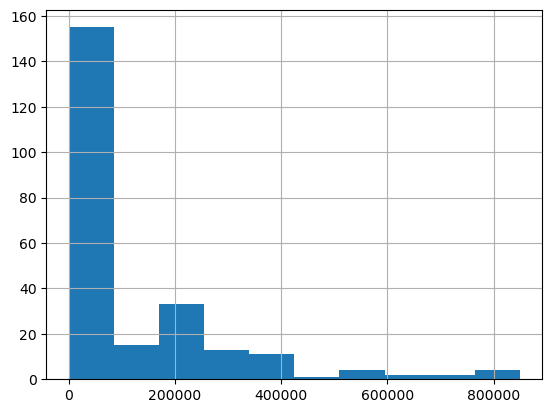

In [11]:
df.lumin.hist()

Данные выглядят хорошо, нет выбросов

<Axes: >

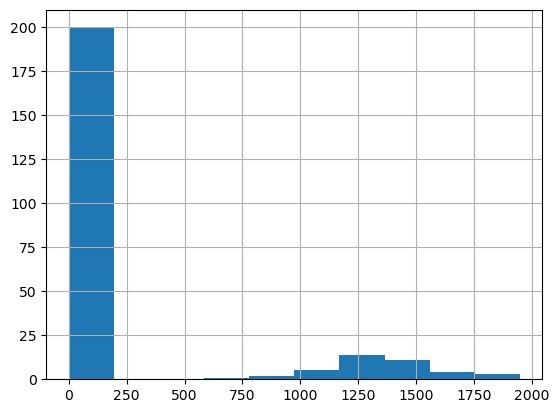

In [12]:
df.radius.hist()

Есть разрыв между данными, но это не похоже на выброс

<Axes: >

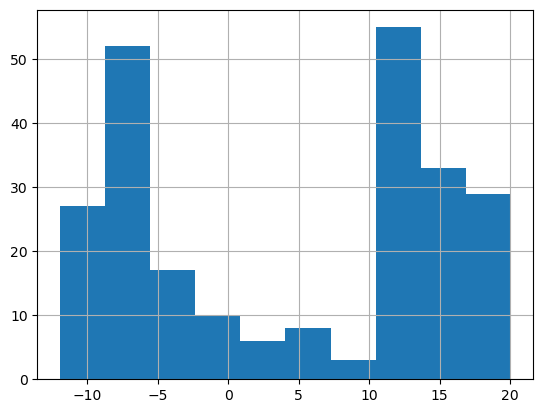

In [13]:
df.magnitude.hist()

Данные разбросанные, но это не похоже на выброс

# Подготовка данных

In [14]:
pd.value_counts(df.color)

color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64

In [15]:
df.color = df.color.replace({
    'Blue-white': 'Blue White',
    'Blue white': 'Blue White',
    'Blue white ': 'Blue White',
    'Blue-White': 'Blue White',
    'yellow-white': 'Yellow',
    'Yellowish White': 'Yellow',
    'White-Yellow': 'Yellow',
    'yellowish': 'Yellow',
    'Yellowish': 'Yellow',
    'Yellow White': 'Yellow',
    'white': 'White',
    'whitish': 'White',
    'Whitish': 'White',
    'Pale yellow orange': 'Orange',
    'Blue ': 'Blue',
    'Orange-Red': 'Orange'
})

In [16]:
pd.value_counts(df.color)

color
Red           112
Blue           56
Blue White     41
Yellow         15
White          12
Orange          4
Name: count, dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, хорошо:)
</div>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('temp', axis=1), df.temp, test_size=0.1, random_state=RANDOM_STATE)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В тест лучше больше данных отдать, например, 20%
</div>

In [18]:
X_train_num = X_train.drop(['color', 'type'], axis=1)
X_test_num = X_test.drop(['color', 'type'], axis=1)

In [19]:
columns_num = X_train_num.columns

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train_num)

StandardScaler()

In [22]:
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [23]:
X_train_num = pd.DataFrame(X_train_num, columns=columns_num)
X_test_num = pd.DataFrame(X_test_num, columns=columns_num)

In [24]:
X_train_cat = X_train[['color', 'type']]
X_test_cat = X_test[['color', 'type']]

In [25]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [26]:
ohe.fit(X_train_cat)

OneHotEncoder(handle_unknown='ignore')

In [27]:
X_train_cat = ohe.transform(X_train_cat).toarray()
X_test_cat = ohe.transform(X_test_cat).toarray()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
название столбцов можно получить еще с помощью `get_feature_names/get_feature_names_out`
</div>

#КОД РЕВЬЮЕРА
ohe.get_feature_names()

In [28]:
columns_cat = ohe.categories_[0].tolist()
columns_cat.extend(ohe.categories_[1].tolist())

In [29]:
columns_cat

['Blue', 'Blue White', 'Orange', 'Red', 'White', 'Yellow', 0, 1, 2, 3, 4, 5]

In [30]:
X_train_cat = pd.DataFrame(data=X_train_cat, columns=columns_cat)
X_test_cat = pd.DataFrame(data=X_test_cat, columns=columns_cat)

In [31]:
X_train = X_train_num.join(X_train_cat)
X_test = X_test_num.join(X_test_cat)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Данные подготовил корректно
    
    
Чтобы упростить себе задачу, можно воспользоваться ColumnTransformer
    
    
```python
    from sklearn.compose import ColumnTransformer
    numeric = <your code>
    categorical = <your code>
    col_transformer = ColumnTransformer(
                            transformers=[
                                ('scaler', StandardScaler(), numeric),
                                ('ohe', OneHotEncoder(sparse=False, drop='first'), categorical)],
                                remainder='passthrough')

    X_train = col_transformer.fit_transform(X_train)
    X_test = col_transformer.transform(X_test)
```
+  https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260
+  https://medium.com/analytics-vidhya/handling-heterogeneous-features-in-a-dataset-using-columntransformer-aa525ebe0486 
    

</div>

In [32]:
X_train_t = torch.FloatTensor(X_train.values)
X_test_t = torch.FloatTensor(X_test.values)
y_train_t = torch.FloatTensor(y_train.values)
y_test_t = torch.FloatTensor(y_test.values)

# Построение нейронной сети
- линейная сеть
- линейная сеть с 5 слоями
- линейная сеть с функцией активации

In [33]:
learning_rate = 0.001

In [34]:
class NetSimpleSingle(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons, n_out_neurons):
        super(NetSimpleSingle, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons)
        self.fc2 = nn.Linear(n_hidden_neurons, n_out_neurons)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [35]:
net_simple_single = NetSimpleSingle(15, 15, 1)
optimizer = torch.optim.Adam(net_simple_single.parameters(), lr=learning_rate)
n_epochs = 30000
loss = nn.MSELoss()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Для начала хорошо
</div>

In [36]:
net_simple_single_mse_train = []
net_simple_single_mse_test = []

In [37]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_simple_single.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == n_epochs - 1:
        net_simple_single.eval()
        z_test_t = net_simple_single.forward(X_test_t).flatten()
        mse_value_test = loss(z_test_t, y_test_t)

        net_simple_single_mse_train.append(mse_value_train.item())
        net_simple_single_mse_test.append(mse_value_test.item())

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Смотри, очень не хватает визуализации обучения. Вот смотри:

</div>

In [39]:
from sklearn.metrics import mean_squared_error
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_simple_single.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    if epoch % 1000 == 0 or epoch == n_epochs - 1:
        with torch.no_grad(): # еще можно отключить вычисления градиентов это ускорит обучение 
            net_simple_single.eval()
            z_test_t = net_simple_single.forward(X_test_t).flatten()
#             mse_value_test = loss(z_test_t, y_test_t)  
            mse_value_test = mean_squared_error(z_test_t, y_test_t, squared=False)# воспользуемся готовой функцией для подсчета RMSE
            print(f"Epoch: {epoch}, RMSE test: {mse_value_test}")

            net_simple_single_mse_train.append(mse_value_train.item())
            net_simple_single_mse_test.append(mse_value_test.item())

Epoch: 0, RMSE test: 4947.65478515625
Epoch: 1000, RMSE test: 4947.64892578125
Epoch: 2000, RMSE test: 4947.6611328125
Epoch: 3000, RMSE test: 4947.66357421875
Epoch: 4000, RMSE test: 4947.6669921875
Epoch: 5000, RMSE test: 4947.6611328125
Epoch: 6000, RMSE test: 4947.60302734375
Epoch: 7000, RMSE test: 4947.669921875
Epoch: 8000, RMSE test: 4947.654296875
Epoch: 9000, RMSE test: 4947.64892578125
Epoch: 10000, RMSE test: 4947.640625
Epoch: 11000, RMSE test: 4947.65283203125
Epoch: 12000, RMSE test: 4947.65869140625
Epoch: 13000, RMSE test: 4947.6474609375
Epoch: 14000, RMSE test: 4947.62158203125
Epoch: 15000, RMSE test: 4947.63525390625
Epoch: 16000, RMSE test: 4947.63623046875
Epoch: 17000, RMSE test: 4947.6552734375
Epoch: 18000, RMSE test: 4947.64990234375
Epoch: 19000, RMSE test: 4947.62890625
Epoch: 20000, RMSE test: 4947.66552734375
Epoch: 21000, RMSE test: 4947.65087890625
Epoch: 22000, RMSE test: 4947.6484375
Epoch: 23000, RMSE test: 4947.62890625
Epoch: 24000, RMSE test: 4947

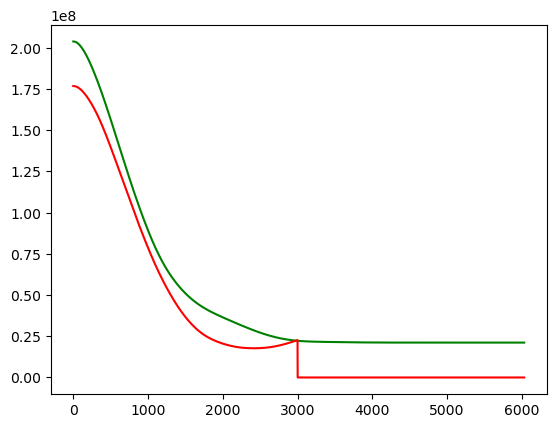

In [40]:
net_simple_single_mse_x = np.arange(len(net_simple_single_mse_test))
plt.plot(net_simple_single_mse_x, net_simple_single_mse_train, color='green')
plt.plot(net_simple_single_mse_x, net_simple_single_mse_test, color='red')
plt.show()

- ошибка высока
- остановить обучение надо было бы около 23000 epochs

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Супер, что построил график лосса, но лучше еще рядом построить график, то как наша метрика растет/падает/изменяется

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Если воспользуешься Dataset и Dataloader, то будешь героем!!! Огромный плюс, в том, что тебе не придется самому делать батчи + удобно очень использовать и выгружать данные (на больших проектах очень выручают, поэтому будет круто если разберешься, там нет ничего сложного, если что могу помочь, если не получится) P.S если что, не обращай внимание на collate_fn
                
+  https://towardsdatascience.com/how-to-use-datasets-and-dataloader-in-pytorch-for-custom-text-data-270eed7f7c00
    
    
P.S В самом конце проекта оставил код с Dataset и Dataloader это на случай если не получится или запутаешься:) Попробуй разобраться самостоятельно
    

Да, ты прав, у нас происходит переобучение и нужно вовремя остановиться. Для этого воспользуемся EarlyStopping, благодаря ему можно не подбирать кол-во эпох
                
+  https://debuggercafe.com/using-learning-rate-scheduler-and-early-stopping-with-pytorch/
</div>

#КОД РЕВЬЮЕРА
class CustomEarlyStopping():
    """
    Ранняя остановка, чтобы остановить тренировку, когда потеря не улучшается после определенной эпохи.
    """
    def __init__(self, patience=5, min_delta=100):
        """
        :param patience: сколько эпох ждать, прежде чем остановиться, когда потеря не улучшается
        :param min_delta: минимальная разница между loss/метриками, если улучшений нет, то остановим обучение
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping', f'delta={self.best_loss - val_loss}')
                self.early_stop = True

%%time
#КОД РЕВЬЮЕРА
test_rmse = list(range(10000, 5000, -500)) + list(range(1000, 6000, 100))

early_stopping = CustomEarlyStopping(patience=2, min_delta=10) #эти параметры можно подбирать

for i in test_rmse:
    print("RMSE: ", i)
    early_stopping(i)
    if early_stopping.early_stop:
        break

In [41]:
net_simple_setup = []
n_hidden_layers = 5
for i in range(n_hidden_layers):
    net_simple_setup.append(nn.Linear(15, 15))
net_simple_setup.append(nn.Linear(15, 1)) # layer out

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Идея хорошая, но, лучше будет если будешь менять кол-во нейронов. Можно кстати это делать рандомно 
    
P.S Baseline подразумевает, что мы прогоним созданную нейросеть и посмотрим, что же получится. Без какого либо подбора параметро и чего либо еще. Baseline нужен как скелет, то от чего потом можно будет отталкиваться:)  А улучшения/подбор/какого либо рода модификация уже в следующем разделе
</div>

In [42]:
net_simple_five = nn.Sequential(*net_simple_setup)
n_epochs = 1000
optimizer = torch.optim.Adam(net_simple_five.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [43]:
net_simple_five_mse_train = []
net_simple_five_mse_test = []

In [44]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_simple_five.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == n_epochs - 1:
        net_simple_five.eval()
        z_test_t = net_simple_five.forward(X_test_t).flatten()
        mse_value_test = loss(z_test_t, y_test_t)
        mse_value_test.backward()

        net_simple_five_mse_train.append(mse_value_train.item())
        net_simple_five_mse_test.append(mse_value_test.item())

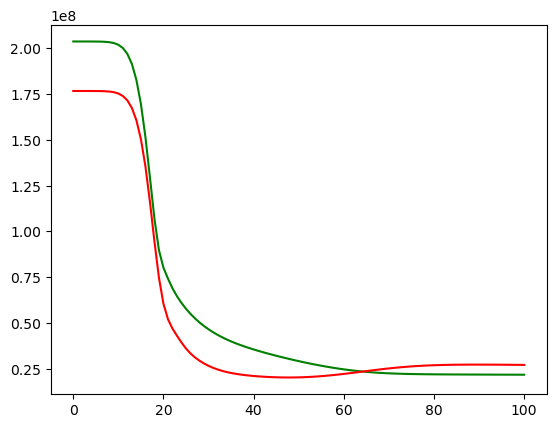

In [45]:
net_simple_five_mse_x = np.arange(len(net_simple_five_mse_test))
plt.plot(net_simple_five_mse_x, net_simple_five_mse_train, color='green')
plt.plot(net_simple_five_mse_x, net_simple_five_mse_test, color='red')
plt.show()

- ошибка не улучшилась, но благодаря слоям модель обучается быстрее

In [46]:
net_swish_setup = []
n_hidden_layers = 20
for i in range(n_hidden_layers):
    net_swish_setup.append(nn.Linear(15, 15))
    net_swish_setup.append(nn.Hardswish())
net_swish_setup.append(nn.Linear(15, 1)) # layer out

In [47]:
net_swish = nn.Sequential(*net_swish_setup)
n_epochs = 1000
optimizer = torch.optim.Adam(net_swish.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [48]:
net_swish_mse_train = []
net_swish_mse_test = []

In [49]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_swish.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    if epoch % 5 == 0 or epoch == n_epochs - 1:
        net_swish.eval()
        z_test_t = net_swish.forward(X_test_t).flatten()
        mse_value_test = loss(z_test_t, y_test_t)

        net_swish_mse_train.append(mse_value_train.item())
        net_swish_mse_test.append(mse_value_test.item())

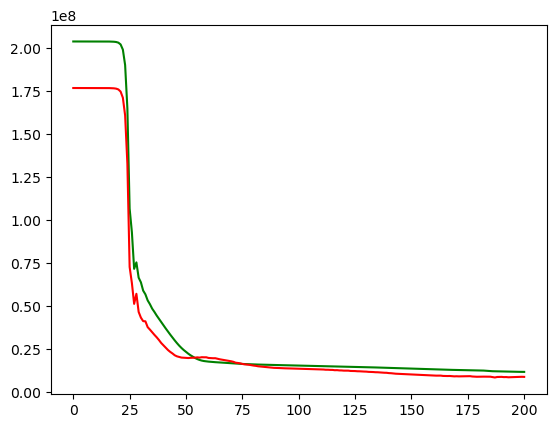

In [50]:
net_swish_mse_x = np.arange(len(net_swish_mse_train))
plt.plot(net_swish_mse_x, net_swish_mse_train, color='green')
plt.plot(net_swish_mse_x, net_swish_mse_test, color='red')
plt.show()

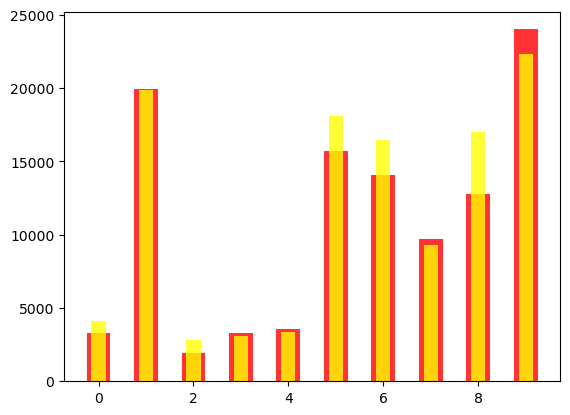

In [51]:
x = np.arange(10)
plt.bar(x, y_test_t.detach().numpy()[:10], width=0.5, alpha=0.8, color='red')
plt.bar(x, z_test_t.detach().numpy()[:10], width=0.3, alpha=0.8, color='yellow')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Хорошо
</div>

# Улучшение сети

- Dropout
- Batch Normalization

In [92]:
net_b_norm_setup = []
n_hidden_layers = 20
for i in range(n_hidden_layers):
    net_b_norm_setup.append(nn.Linear(15, 15))
    net_b_norm_setup.append(nn.BatchNorm1d(15))
    net_b_norm_setup.append(nn.Hardswish())
net_b_norm_setup.append(nn.Linear(15, 1)) # layer out

In [93]:
net_b_norm = nn.Sequential(*net_b_norm_setup)
n_epochs = 1200
optimizer = torch.optim.Adam(net_b_norm.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [95]:
net_b_norm_mse_train = []
net_b_norm_mse_test = []

In [96]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_b_norm.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    net_b_norm.eval()
    z_test_t = net_b_norm.forward(X_test_t).flatten()
    mse_value_test = loss(z_test_t, y_test_t)

    net_b_norm_mse_train.append(mse_value_train.item())
    net_b_norm_mse_test.append(mse_value_test.item())
    
    rmse = torch.sqrt(torch.sum(torch.pow(y_test_t - z_test_t, 2))/y_test_t.shape[0]).item()
    if rmse <= 4500:
        print(rmse)
        break

4485.3994140625


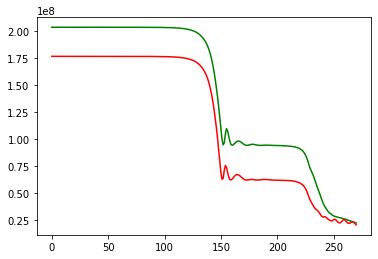

In [97]:
net_b_norm_mse_x = np.arange(len(net_b_norm_mse_train))
plt.plot(net_b_norm_mse_x, net_b_norm_mse_train, color='green')
plt.plot(net_b_norm_mse_x, net_b_norm_mse_test, color='red')
plt.show()

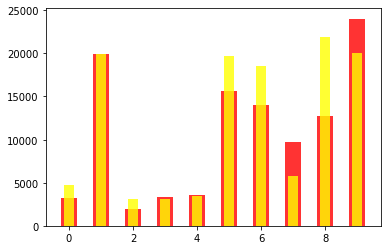

In [98]:
x = np.arange(10)
plt.bar(x, y_test_t.detach().numpy()[:10], width=0.5, alpha=0.8, color='red')
plt.bar(x, z_test_t.detach().numpy()[:10], width=0.3, alpha=0.8, color='yellow')
plt.show()

In [99]:
net_drop_setup = []
n_hidden_layers = 20
for i in range(n_hidden_layers):
    net_drop_setup.append(nn.Linear(15, 15))
    net_drop_setup.append(nn.Dropout(p=0.5))
    net_drop_setup.append(nn.Hardswish())
net_drop_setup.append(nn.Linear(15, 1)) # layer out

In [100]:
net_drop = nn.Sequential(*net_drop_setup)
n_epochs = 1400
optimizer = torch.optim.Adam(net_drop.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [101]:
net_drop_mse_train = []
net_drop_mse_test = []

In [102]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_drop.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()
    
    net_drop.eval()
    z_test_t = net_drop.forward(X_test_t).flatten()
    mse_value_test = loss(z_test_t, y_test_t)

    net_drop_mse_train.append(mse_value_train.item())
    net_drop_mse_test.append(mse_value_test.item())
    
    rmse = torch.sqrt(torch.sum(torch.pow(y_test_t - z_test_t, 2))/y_test_t.shape[0]).item()
    if rmse <= 4500:
        print(rmse)
        break

4494.97265625


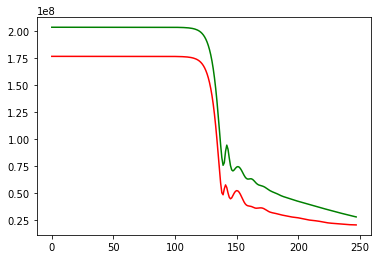

In [103]:
net_drop_mse_x = np.arange(len(net_drop_mse_train))
plt.plot(net_drop_mse_x, net_drop_mse_train, color='green')
plt.plot(net_drop_mse_x, net_drop_mse_test, color='red')
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Кстати, как отличается данный график от предыдущего? что изменилось?
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>
    Из за организации у меня исползовались резултаты с прошлого теста моделей, теперь работает коректно.</div>

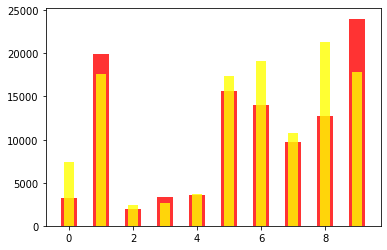

In [104]:
x = np.arange(10)
plt.bar(x, y_test_t.detach().numpy()[:10], width=0.5, alpha=0.8, color='red')
plt.bar(x, z_test_t.detach().numpy()[:10], width=0.3, alpha=0.8, color='yellow')
plt.show()

In [105]:
rmse = torch.sqrt(torch.sum(torch.pow(y_test_t - z_test_t, 2))/y_test_t.shape[0]).item()

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> У тебя формула тут получилась:

$RMSE = \sqrt { \sum_{i=1}^n (y_i - pred_i)^2}$
    
А какая формула RMSE на самом деле?
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>
    Все верно, я забыл разделить на количество элементов.</div>

In [106]:
print(rmse)

4494.97265625


<div class="alert alert-success">
<b>Комментарий ревьюера V3✔️:</b> Да,  огонь, хорошо:)
</div>

# Выводы

У нас получилось натренировать модель до нужного показателя и оба метода улучшения модели помогли нам с этим. И dropout и Batch Normalization. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
```python    
    from torch.utils.data import Dataset, DataLoader
    dataset_train = torch.utils.data.TensorDataset(x_train, y_train)
    dataset_test = torch.utils.data.TensorDataset(x_test, y_test)

    train_dataloader = DataLoader(dataset_train, batch_size=32, shuffle=True,
                                  num_workers=0)
    test_dataloader = DataLoader(dataset_test, batch_size=32, num_workers=0)               
```       
Пример обучения:
    
    
    
```python
   for epoch in range(num_epochs):
    net.train()
    for batch in train_dataloader:
        data_train, temperature_train = batch # просто выгружаем данные 
        optimizer.zero_grad()
        
        preds = net.forward(data_train).flatten()
               
        loss_value = torch.sqrt(loss(preds, temperature_train))
        loss_value.backward()
        optimizer.step()
        
    if epoch % 200 == 0:
        predicted_temp = [] 
        with torch.no_grad():
            net.eval()
            for batch in test_dataloader:
                data_test, temperature_test = batch # просто выгружаем данные
                
                test_preds = net.forward(data_test).flatten()
                predicted_temp.append(test_preds)
                RMSE_loss = torch.sqrt(loss(test_preds, temperature_test))
                
        predicted_temp = torch.cat(predicted_temp).detach().numpy()
        RMSE = mean_squared_error(y_test, predicted_temp, squared=False)
        early_stopping(RMSE)
        print(f"epoch:{epoch}, RMSE test: {RMSE}")
        
        if early_stopping.early_stop:
            print('Early Stoppning!!!')
            break 
    
    
```
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Немного полезного материала:    

1) Интересный контент вот здесь есть: https://neural-university.ru/ - институт нейросетей. <br>
2) Ребята из-за "бугра": https://www.reg.ru/blog/stenfordskij-kurs-lekciya-1-vvedenie/ (тут про свёрточные, но интересно)<br>
3) Интересная статья специалиста Тесла: https://karpathy.github.io/neuralnets/ <br>
4) Список книг на выбор: https://habr.com/ru/company/neurodatalab/blog/336218/ <br>



Кстати есть еще нейросеть TabNet, которая заточена для работы с табличными данными:
+  https://habr.com/ru/post/540736/    
+  https://www.kaggle.com/code/carlmcbrideellis/tabnet-a-very-simple-regression-example/notebook

</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Владислав, получился хороший проект! 
    
Если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>


<div class="alert alert-info"> <b>Комментарий студента:</b>
    Спасибо за советы. Я обязательно вернусь к этому проэкту, просто немного опаздываю по дедлайну 🫣.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V3✔️:</b> Удачи в следующих проектах!!!
</div>